# Diamonds

We've used the diamonds dataset before, but glossed over a very important feature there: the categoricals. First load it again.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("files/diamonds.csv", index_col=0)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Create a bar-chart showing how many diamonds there are of every cut. You can use matplotlib and grouping, but easier would be to use seaborn's countplot.

<Axes: xlabel='cut', ylabel='count'>

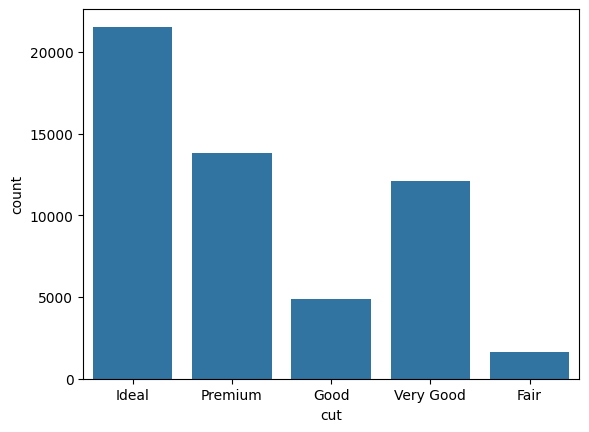

In [2]:
sns.countplot(x="cut", data=df)

The bottom line of the previous graph is:

![](files/2022-08-30-13-39-46.png)

Which isn't good because there is an order in the cut of diamonds. It's:

<code>['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']</code>


Turn the "cut"-column into an ordered categorical column. You can use the list in this markdown-cell. We have a second one of those lists:

<code>['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']</code>

This is the "clarity", another ordered categorical.

In [4]:
# DELETE

from pandas.api.types import CategoricalDtype

cut_type = CategoricalDtype(categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
df["cut"] = df['cut'].astype(cut_type)

cat_clarities = CategoricalDtype(categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
df ['clarity'] = df['clarity'].astype(cat_clarities)

Now recreate the previous graph. The labels on the axis should be sorted correctly now.

<Axes: xlabel='cut', ylabel='count'>

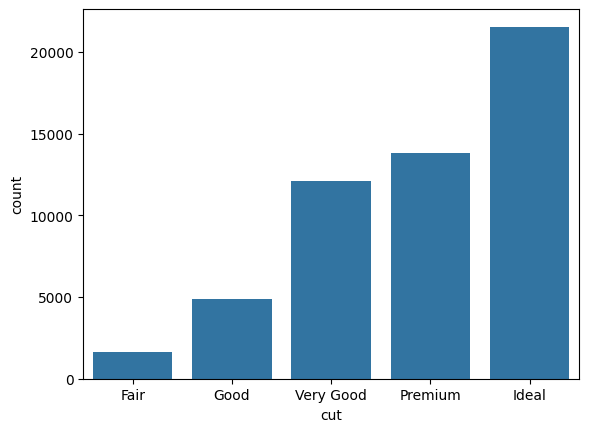

In [5]:
sns.countplot(x="cut", data=df)

Show a distribution of diamonds by size (aka carat). Try to do it in three words. (A _histogram_ on _carat_ in the dataset _df_, but in reverse).

That's it, really. But do our models need it?

Some models, like a naive bayes, won't benefit at all. Other models, like a linear regression, need text to be converted to numbers. In those cases you're blessed by having ordered (or ordinal) categoricals as the give you the excuses to model them as numbers, 0 for the lowest (smallest, less good, cheaper, shorter, ...) category and going up from there.

If you have nominal or unordered categoricals you'll have to start doing one-hot encoding which may lead to parameter explosion.